<a href="https://colab.research.google.com/github/Vishwaak/Time-for-Machine/blob/master/%5BFinal%5DFlower_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
# Install Kaggle library and importing dataset
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip /content/flowers-recognition.zip

cp: cannot stat '/content/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open /content/flowers-recognition.zip, /content/flowers-recognition.zip.zip or /content/flowers-recognition.zip.ZIP.


In [0]:
import os
import torch
from torchvision import transforms , datasets , models
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.autograd import Variable


In [0]:
#splits dataset into train, val , test sets.
!pip install split-folders
!split_folders flowers --ratio .8 .1 .1

Copying files: 4326 files [00:01, 3513.03 files/s]


In [0]:
!mkdir outputer
train_dir = '/content/output/train'
test_dir = '/content/output/test'
val_dir = '/content/output/val'
# classes are folders in each directory with these names
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [0]:
# load and transform data using ImageFolder
data_transform = transforms.Compose([transforms.RandomResizedCrop(225), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
#Preparing the train and test data
trainloader = torch.utils.data.DataLoader(train_data , shuffle= True)
valloader = torch.utils.data.DataLoader(val_data)
testloader = torch.utils.data.DataLoader(test_data)
# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  3457
Num test images:  436


In [0]:
model = models.densenet121(pretrained = True)
print(model1)
for parm in model1.parameters():
    parm.required_grad = False
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1000, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 4)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier
print(model)

ValueError: ignored

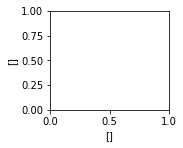

In [0]:
import numpy as np
detaiter = iter(train_data)
images , labels = next(detaiter)
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for i in np.arange(20):
    ax = fig.add_subplot(2 , 20/2 , i+1 , xlabel=[] , ylabel=[])
    plt.imshow(np.transpose(images[i], (1,2,0)))
    ax.set_title(classes[labels[i]])
    

In [0]:
#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------
!pip install mahotas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

#--------------------
# tunable-parameters
#--------------------
images_per_class = 600
fixed_size       = tuple((256, 256))
train_path       = "/content/output/train"
h5_data          = 'outputer/data.h5'
h5_labels        = 'outputer/labels.h5'
bins             = 8

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.8-cp36-cp36m-linux_x86_64.whl size=4263983 sha256=52d9a813cfe59d8264016ce87601383ef0bf36c68dbe6a3257c7936a98e75d70
  Stored in directory: /root/.cache/pip/wheels/3e/8b/93/690deca49a46242df274db70dbef26c0a6fa86e378b677e1ab
Successfully built mahotas


In [0]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [0]:
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [0]:
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [0]:
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
#train_labels.remove('.ipynb_checkpoints')
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['daisy', 'dandelion', 'flowers', 'rose', 'sunflower', 'tulip']


In [0]:
from google.colab.patches import cv2_imshow
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)
    dir = dir + "/"
    # get the current training label
    current_label = training_name
    # loop over the images in each sub-folder
    for x in os.listdir(dir):
        # get the image file name
        if "jpg" in x:
            file = dir + x
        # read the image and resize it to a fixed-size
            image = cv2.imread(file)
            image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
            fv_hu_moments = fd_hu_moments(image)
            fv_haralick   = fd_haralick(image)
            fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
            global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
            labels.append(current_label)
            global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

[STATUS] processed folder: daisy
[STATUS] processed folder: dandelion
[STATUS] processed folder: flowers
[STATUS] processed folder: rose
[STATUS] processed folder: sunflower
[STATUS] processed folder: tulip
[STATUS] completed Global Feature Extraction...


In [0]:
print(global_features)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
train_label = classes[:]
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

[STATUS] feature vector size (3457, 532)
[STATUS] training Labels (3457,)
[STATUS] training labels encoded...
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 ... 4 4 4]
[STATUS] target labels shape: (3457,)
[STATUS] end of training..


In [0]:
import numpy as np
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = 1 / (1 + np.exp(-float(np.matmul(theta, X[i]))))
    h = h.reshape(X.shape[0])
    return h
def BGD(theta, alpha, num_iters, h, X, y, n):
    theta_history = np.ones((num_iters,n+1))
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j]=theta[j]-(alpha/X.shape[0])*sum((h-y)
                               *X.transpose()[j])
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i]=(-1/X.shape[0])*sum(y*np.log(h)+(1-y)*np.log(1 - h))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost
def logistic_regression(X, y, alpha, num_iters=10000):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta,theta_history,cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, theta_history, cost

In [0]:
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

#--------------------
# tunable-parameters
#--------------------
num_trees = 100
test_size = 0.10
seed      = 10
train_path = "output/train"
test_path  = "output/test"
h5_data    = 'outputer/data.h5'
h5_labels  = 'outputer/labels.h5'
scoring    = "accuracy"
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()

if not os.path.exists(test_path):
    os.makedirs(test_path)

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('SVM', SVC(random_state=seed)))
models.append(('RF' , RandomForestClassifier(n_estimators=num_trees , random_state=seed)))
models.append(('K-NN' ,KMeans()))
# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (3457, 532)
[STATUS] labels shape: (3457,)
[STATUS] training started...


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))


[STATUS] splitted train and test data...
Train data  : (3111, 532)
Test data   : (346, 532)
Train labels: (3111,)
Test labels : (346,)


LR: 0.531664 (0.031342) 
KNN: 0.466736 (0.026701) 
CART: 0.512379 (0.025522) 
SVM: 0.239466 (0.022718) 
RF: 0.653488 (0.036401) 


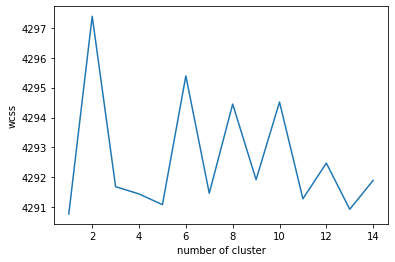

K-NN: 0.653488 (0.036401) 


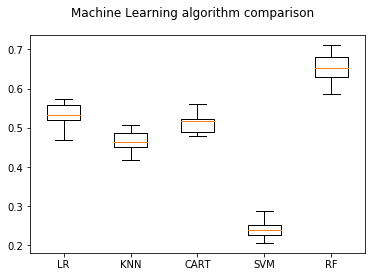

In [0]:
# 10-fold cross validation
wcss = []
for name, model in models:
    if  name != 'K-NN':
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
    if name == 'K-NN':
        for i in range(1,15):
            #kmeans = model(n_clusters=i , init='k-means++', max_iter=300 , n_init=10 , random_state=0)
            model.fit(trainDataGlobal)
            wcss.append(model.inertia_)
        plt.plot(range(1,15), wcss)
        plt.xlabel('number of cluster')
        plt.ylabel('wcss')
        plt.show()
    msg = "%s: %f (%f) " % (name, cv_results.mean(), cv_results.std())
    print(msg)


# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [0]:
import numpy
theta,theta_history,cost=logistic_regression(trainDataGlobal,trainLabelsGlobal,0.001)
cost = list(cost)
n_iterations = [x for x in range(1,1001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

NameError: ignored

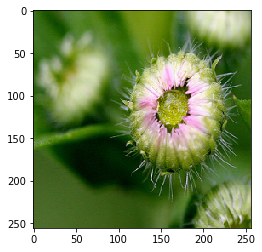

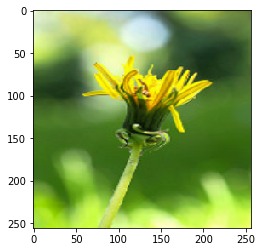

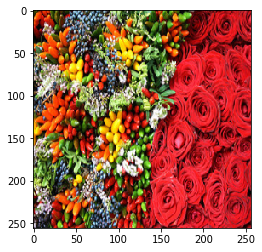

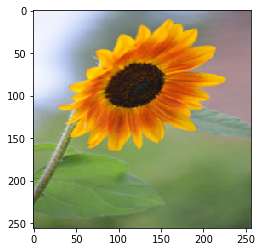

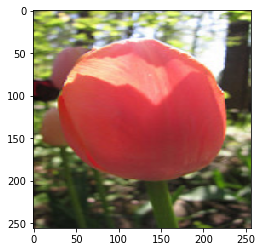

=====Final Predictions=====
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [0]:
clf  = RandomForestClassifier(n_estimators=num_trees , random_state=seed)

# fit the training data to the model
clf.fit(trainDataGlobal,trainLabelsGlobal)

for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(test_path, training_name)
    dir = dir + "/"
    # loop over the images in each sub-folder
    for x in os.listdir(dir):
        file2 = dir + x
        image = cv2.imread(file2)

        # resize the image
        image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # scale features in the range (0-1)
        scaler = MinMaxScaler(feature_range=(0, 1))
        rescaled_feature = scaler.fit_transform(global_feature.reshape(1,-1))

        # predict label of test image
        predictions = clf.predict(rescaled_feature.reshape(1,-1))[0]

        # show predicted label on image
        
        #cv2.putText(image, train_labels[predictions], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)
        # display the output image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        
        break
print("=====Final Predictions=====")
print(train_label)
        
    